In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



X est la matrice des donn´ees (de taille n ˆ p), k le nombre de clusters souhait´e, M une matrice contenant les centro¨ıdes initiaux (de taille k ˆp), et maxit d´efinit le nombre maximal d’it´erations accept´e. Lorsque l’utilisateur ne fournit pas la matrice M des centro¨ıdes initiaux (donc M is None est vraie), l’algorithme devra la construire en choisissant al´eatoirement (avec probabilit´e uniforme) k donn´ees parmi les n fournies.

In [89]:
def kmeans(X, k, M=None, maxit=100):
    n, p = X.shape
    if M is None:
        random_indices = np.random.choice(n, size = k, replace=False)
        M = X[random_indices]

    for it in range(maxit):

        # --- MAJ DE Z --- #
        D = np.linalg.norm(X[:, np.newaxis, :] - M[np.newaxis, :, :], axis=2)

        # assigne les clusters  
        C = np.argmin(D, axis=1)

        Z_new = np.zeros((n, k), dtype=int)

        Z_new[np.arange(n), C] = 1
        
        # --- MAJ DE M --- #
        
        M_new = np.zeros_like(M)

        M_new = Z_new.T @ X
        counts = Z_new.sum(axis=0)[:, np.newaxis]
        M_new = M_new / counts

        # for j in range(k):
        #     count = Z_new[:, j].sum()
        #     if count > 0:
        #         M_new[j] = (Z_new[:, j][:, None] * X).sum(axis=0) / count
        #     else:
        #         M_new[j] = M[j]

        # convergence check
        if np.allclose(M, M_new):
            break
        M = M_new

    return M, C

Nombre de bonnes classifications: 115 / 130
Taux d'erreur de classification: 11.54%


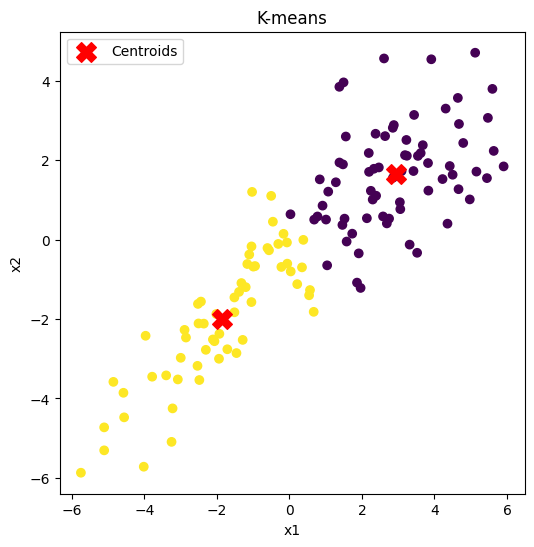

In [126]:
n1 = 50
m_p = [1, 1]

n2 = 80
m_m = [-1,-1]

sigma_2 = 5
X1 = norm.rvs(loc=m_p, scale=np.sqrt(sigma_2), size=(n1, 2))
X2 = norm.rvs(loc=m_m, scale=np.sqrt(sigma_2), size=(n2, 2))

X = np.vstack((X1, X2))
n, p = X.shape

# question 2 c)
# A1 et A2 sont des matrices tirées iid gaussiennes
A1 = norm.rvs(size=(p, p)) 
A2 = norm.rvs(size=(p, p)) 

# normal moyenne m_p et covariance A1*A1^T
X1_c = norm.rvs(loc=m_p, scale=1, size=(n1, p)) @ A1
# normal moyenne m_m et covariance A2*A2^T
X2_c = norm.rvs(loc=m_m, scale=1, size=(n2, p)) @ A2

X = np.vstack((X1_c, X2_c))
n, p = X.shape

k = 2

M, C = kmeans(X, k)

y_true = np.concatenate((np.ones(n1), np.zeros(n2)))

# Nombre de bonnes classifications
nb1 = np.sum(C == y_true)
nb2 = np.sum((1 - C) == y_true)  # cas où les labels sont inversés
nb_bonnes = max(nb1, nb2)
print(f"Nombre de bonnes classifications: {nb_bonnes} / {n}")


# taux d'erreur de classification
taux_erreur = (n - nb_bonnes) / n 
print(f"Taux d'erreur de classification: {taux_erreur*100:.2f}%")

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=C)
plt.scatter(M[:, 0], M[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()



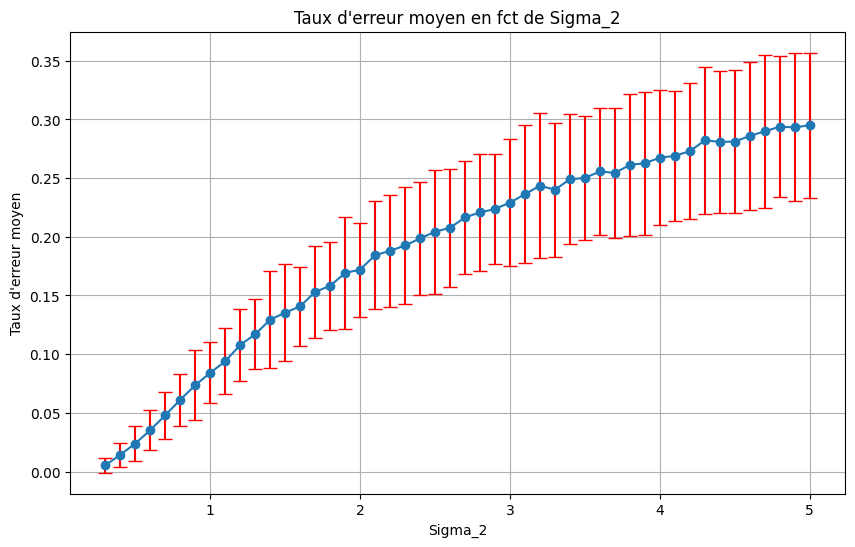

In [91]:
N = 500
# 0.3 0.4 ... 5
sigma_2_values = np.arange(3, 51)/10

avg_taux_erreur_liste = []
ecart_type_liste = []

n1 = 50
m_p = [1, 1]

n2 = 80
m_m = [-1,-1]

for sigma_2 in sigma_2_values:
    taux_erreur = []
    ecart_type = []

    for i in range(N):

        X1 = norm.rvs(loc=m_p, scale=np.sqrt(sigma_2), size=(n1, 2))
        X2 = norm.rvs(loc=m_m, scale=np.sqrt(sigma_2), size=(n2, 2))

        X = np.vstack((X1, X2))

        n, p = X.shape
        k = 2

        M, C = kmeans(X, k)

        y_true = np.concatenate((np.ones(n1), np.zeros(n2)))

        # Nombre de bonnes classifications
        nb1 = np.sum(C == y_true)
        nb2 = np.sum((1 - C) == y_true)  # cas où les labels sont inversés
        nb_bonnes = max(nb1, nb2)

        # taux d'erreur de classification
        taux_erreur.append((n - nb_bonnes) / n)

    # moyenne taux d'erreur
    avg_taux_erreur = np.mean(taux_erreur)
    avg_taux_erreur_liste.append(avg_taux_erreur)

    # ecart type
    ecart_type = np.std(taux_erreur)
    ecart_type_liste.append(ecart_type)
    #print(f"Sigma_2: {sigma_2}, Moyenne taux d'erreur: {avg_taux_erreur:.2f}, Ecart type: {ecart_type:.2f}")


# plot avg taux d'erreur vs sigma_2 and ecart type as error bars
plt.figure(figsize=(10,6))
plt.errorbar(sigma_2_values, avg_taux_erreur_liste, yerr=ecart_type_liste, fmt='-o', ecolor='red', capsize=5)
plt.title('Taux d\'erreur moyen en fct de Sigma_2')
plt.xlabel('Sigma_2')
plt.ylabel('Taux d\'erreur moyen')
plt.grid(True)
plt.show()

# Segmentation image 

(1333, 2000, 3)


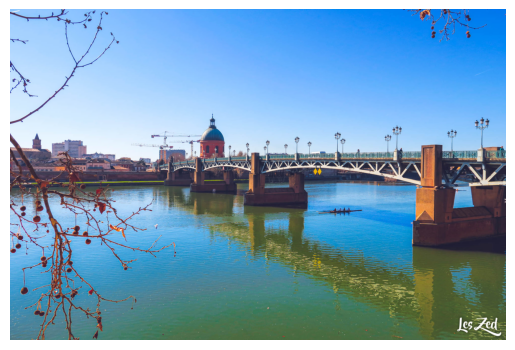

(2666000, 3)


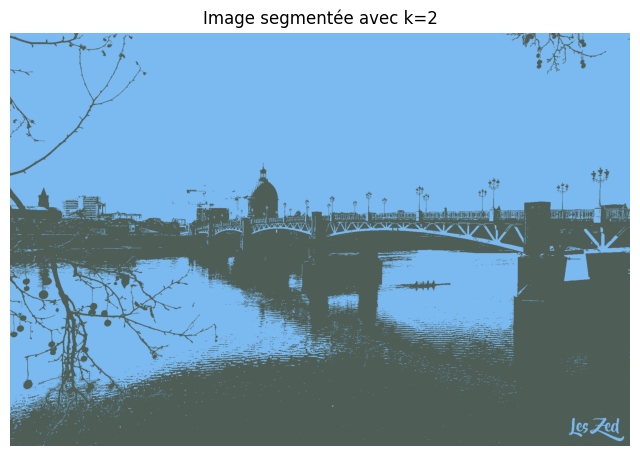

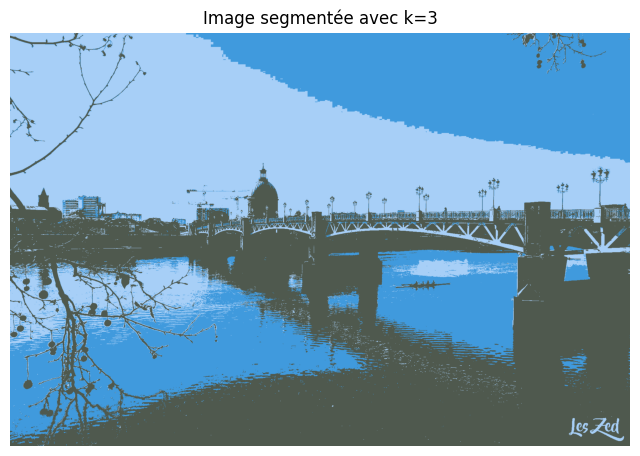

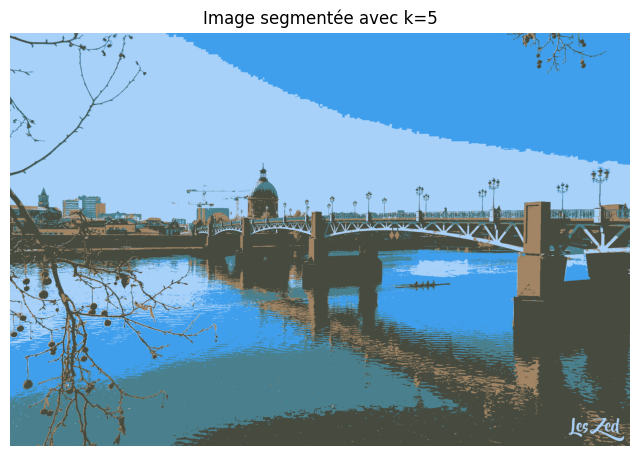

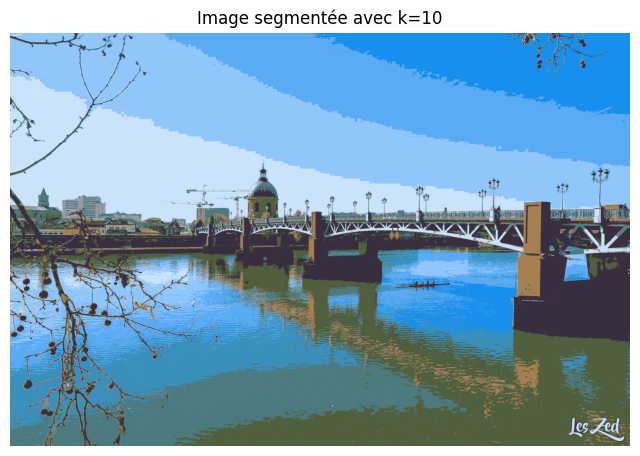

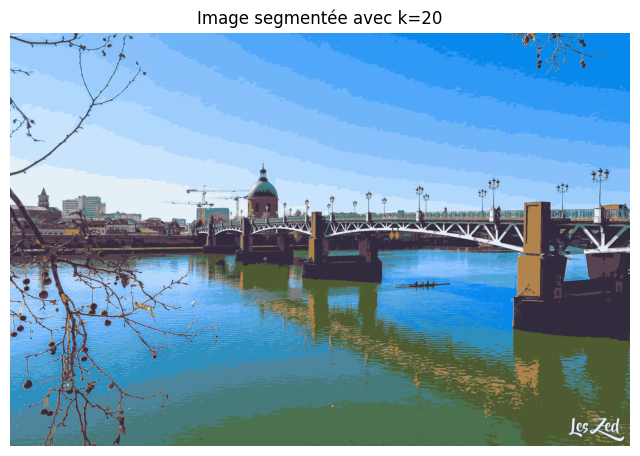

In [131]:
# load toulouse.jpg
img = plt.imread('toulouse.jpg')
shape_originale = img.shape
print(shape_originale)
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')
plt.show()

img = img.reshape(-1, 3)
print(img.shape)

k_values = [2, 3, 5, 10, 20]

for k in k_values:
    M, C = kmeans(img, k)

    img_segmented = M[C]
    img_segmented = img_segmented.astype(np.uint8)
    img_segmented = img_segmented.reshape(shape_originale)

    plt.figure(figsize=(8,6))
    plt.imshow(img_segmented)
    plt.axis('off')
    plt.title(f'Image segmentée avec k={k}')
    plt.show()

    # save the segmented image
    plt.imsave(f'toulouse_segmented_k{k}.png', img_segmented)


